# Step 1: Loading the Data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

#datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

#first few rows
print("Customers Dataset:\n", customers.head())
print("Products Dataset:\n", products.head())
print("Transactions Dataset:\n", transactions.head())


Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166  

# Step 2: Data Inspection

In [31]:
#dataset info
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [32]:
# missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [33]:
# duplicates
print("Customers Duplicates: ", customers.duplicated().sum())
print("Products Duplicates: ", products.duplicated().sum())
print("Transactions Duplicates: ", transactions.duplicated().sum())

Customers Duplicates:  0
Products Duplicates:  0
Transactions Duplicates:  0


# Step 3: Exploratory Analysis

### Customers Count by region

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<Axes: title={'center': 'Customers by Region'}, xlabel='Region'>

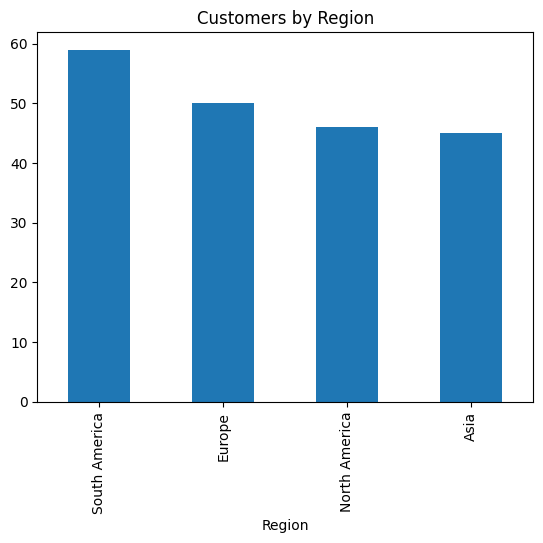

In [34]:
#customer count by region
customers_per_region = customers['Region'].value_counts()
print(customers_per_region)
customers_per_region.plot(kind='bar', title='Customers by Region')


### Product Analysis

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<Axes: title={'center': 'Product Categories'}, xlabel='Category'>

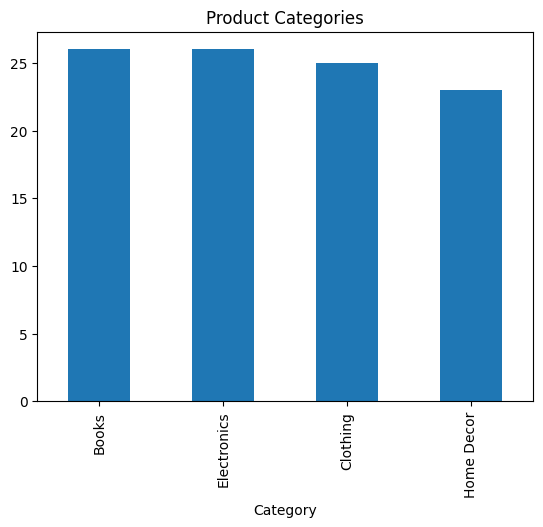

In [35]:
popular_categories = products['Category'].value_counts()
print(popular_categories)
popular_categories.plot(kind='bar', title='Product Categories')


### Transaction Analysis:

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

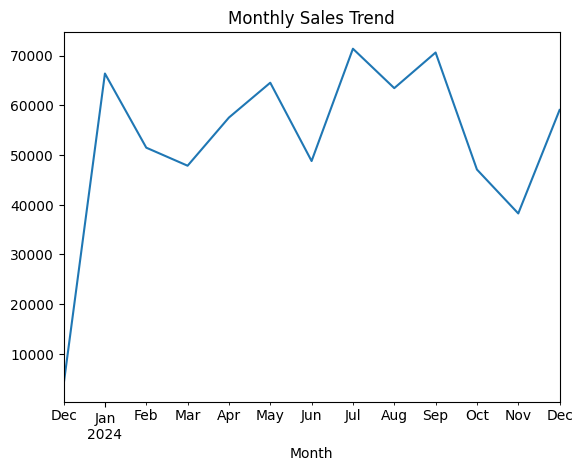

In [36]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trend')


### Top Customers

In [38]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


### Revenue Contribution by Region

<Axes: title={'center': 'Revenue by Region'}, xlabel='Region'>

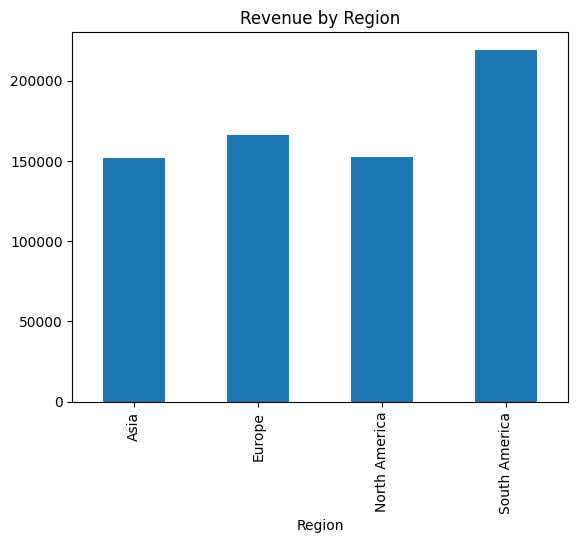

In [39]:
revenue_by_region = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
revenue_by_region.plot(kind='bar', title='Revenue by Region')


### Top Products by Revenue

In [40]:
revenue_by_product = transactions.merge(products, on='ProductID').groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(revenue_by_product)


ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


### Repeat Customers vs. One-Time Customers

Repeat Customers: 187, One-Time Customers: 12


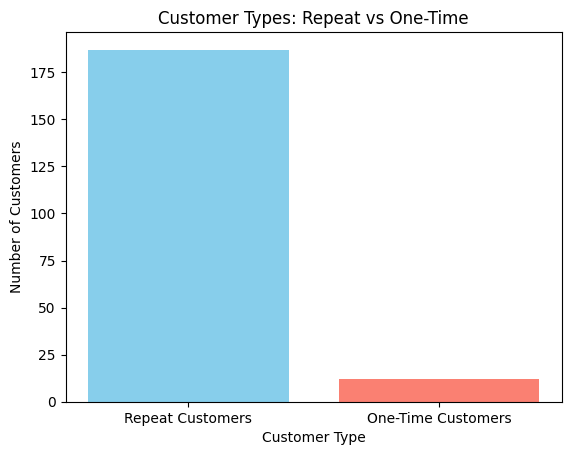

In [41]:
customer_purchases = transactions.groupby('CustomerID')['TransactionID'].nunique()
repeat_customers = (customer_purchases > 1).sum()
one_time_customers = (customer_purchases == 1).sum()
print(f"Repeat Customers: {repeat_customers}, One-Time Customers: {one_time_customers}")

# Data for the plot
customer_types = ['Repeat Customers', 'One-Time Customers']
customer_counts = [repeat_customers, one_time_customers]

# Plot
plt.bar(customer_types, customer_counts, color=['skyblue', 'salmon'])
plt.title('Customer Types: Repeat vs One-Time')
plt.ylabel('Number of Customers')
plt.xlabel('Customer Type')
plt.show()


### Customer Lifetime Value (CLV)

In [42]:
customer_lifetime_value = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("Top 10% Customers:\n", customer_lifetime_value.head(len(customer_lifetime_value) // 10))


Top 10% Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
C0087     6604.23
C0104     6579.10
C0175     6210.53
C0041     6149.78
C0102     6132.36
C0096     6072.92
C0143     6044.63
C0045     6021.80
C0013     6000.56
Name: TotalValue, dtype: float64


### Region-Wise Revenue Contribution by Category

<Axes: title={'center': 'Region-Wise Revenue by Category'}, xlabel='Region'>

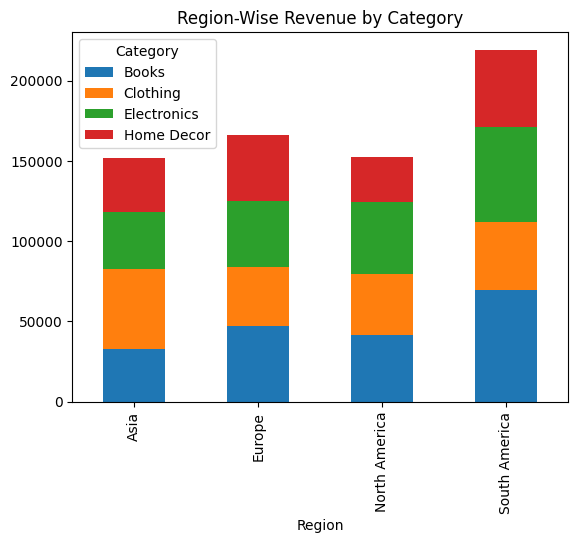

In [43]:
region_category_revenue = (
    transactions.merge(customers, on='CustomerID')
                .merge(products, on='ProductID')
                .groupby(['Region', 'Category'])['TotalValue']
                .sum()
                .unstack()
)
region_category_revenue.plot(kind='bar', stacked=True, title='Region-Wise Revenue by Category')



### Customer Segmentation by Spending and Region

<Axes: title={'center': 'Customer Segmentation by Region and Spending'}, xlabel='Region'>

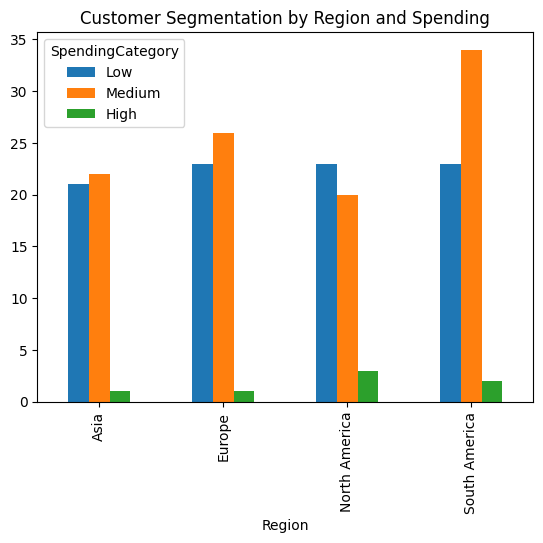

In [44]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
spending_bins = pd.cut(customer_spending, bins=[0, 3000, 7000, float('inf')], labels=['Low', 'Medium', 'High'])
segmented_customers = customers.merge(spending_bins.rename('SpendingCategory'), on='CustomerID')
regional_segments = segmented_customers.groupby(['Region', 'SpendingCategory']).size().unstack()
regional_segments.plot(kind='bar', title='Customer Segmentation by Region and Spending')


### Category-Wise Monthly Revenue Trends

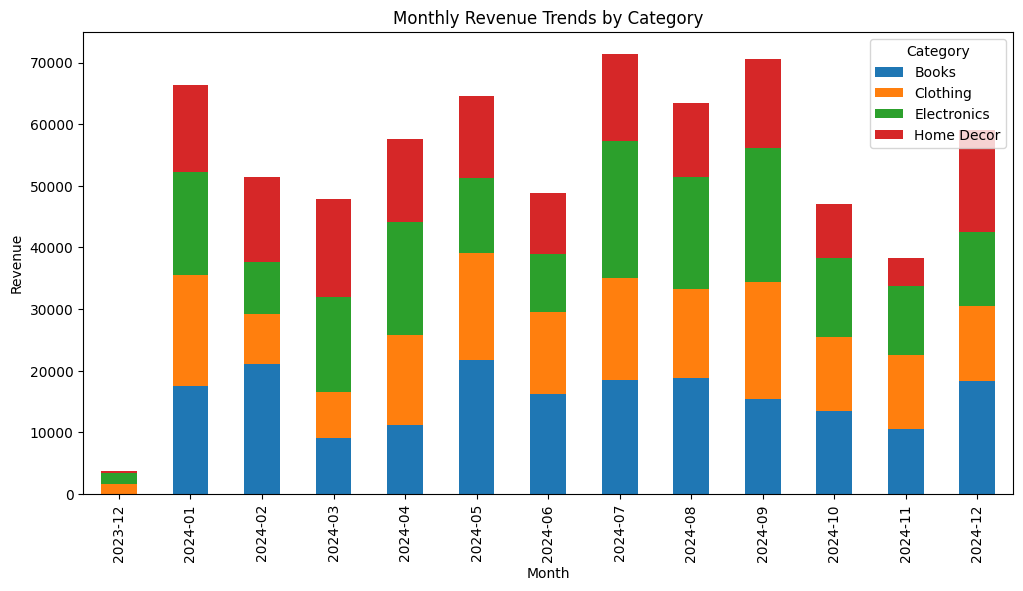

In [25]:
import matplotlib.pyplot as plt
category_monthly_revenue = (
    transactions.merge(products, on='ProductID')
                .groupby([transactions['TransactionDate'].dt.to_period('M'), 'Category'])['TotalValue']
                .sum()
                .unstack()
)
category_monthly_revenue.plot(
    kind='bar',
    stacked=True,
    title='Monthly Revenue Trends by Category',
    figsize=(12, 6)
)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()



### Revenue Trends by Customer Segment

<Axes: title={'center': 'Revenue Trends by Customer Segment'}, xlabel='Month'>

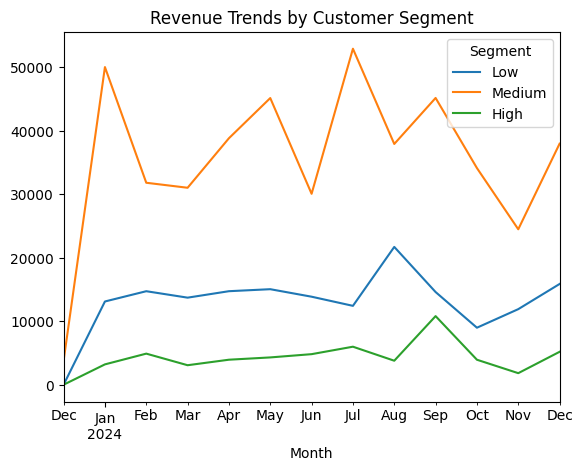

In [45]:

transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
revenue_by_segment = (
    transactions.merge(customers, on='CustomerID')
                .merge(customer_spending.rename('TotalSpending'), on='CustomerID')
)
revenue_by_segment['Segment'] = pd.cut(revenue_by_segment['TotalSpending'], bins=[0, 3000, 7000, float('inf')], labels=['Low', 'Medium', 'High'])
monthly_segment_revenue = revenue_by_segment.groupby(['Month', 'Segment'])['TotalValue'].sum().unstack()
monthly_segment_revenue.plot(kind='line', title='Revenue Trends by Customer Segment')